## Exemplo de Simulated Anneling

Vamos importar duas bibliotecas para poder nos auxiliar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ignored the warning of zero division
np.seterr(divide="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

#### Iniciando as variáveis do SA para uma primeira análise

In [4]:
# Solução inicial
x = 2
y = 1

> Para analisar vamos usar a função de Himmelblau

In [5]:
z = ((x**2) + y - 11)**2 + (x + (y**2) - 7)**2

Vamos imprimir essa primeira solução

In [6]:
print("x é: %0.3f" % x)
print("y é: %0.3f" % y)
print("z é: %0.3f" % z)

x é: 2.000
y é: 1.000
z é: 52.000


### Usando o SA

Declarando as variáveis iniciais

In [8]:
T0 = 1000 #Temperatura
temp_para_plotar = T0 #Variável para plotar a solução

M = 300 # Quantas vezes a temperatura irá decair
N = 15 #Quantas vezes irá procurar pela visinhança
alpha = 0.85 #Quanto você deseja diminuir a temperatura ao aumentar m em 1 (m pequeno) 

k = 0.1 #Ajuda a reduzir o passo a passo

#Variáveis para plotar
temp = [] # Plotar a temperatura
obj_val = []

> Dois laços para caminhar no vizinhança

In [24]:
for i in range(M): # Quantas vezes para decair a temperatura
    for j in range(N):
        
        #Para a variavel de decisão x 
        rand_num_x_1 = np.random.rand() 
        rand_num_x_2 = np.random.rand()
        
        if rand_num_x_1 >= 0.5: #maior que 0.5, iremos aumentar
            step_size_x = k * rand_num_x_2 #Verificar que estamos com menor
        else:
            step_size_x = -k * rand_num_x_2 #Menor que 0.5, nos diminuimos
            
        #Para a variável de decisão y
        rand_num_y_1 = np.random.rand()        
        rand_num_y_2 = np.random.rand()
        
        if rand_num_y_1 >= 0.5:
            step_size_y = k * rand_num_y_2
        else:
            step_size_y = -k * rand_num_y_2
            
        # temporário porque ainda precisamos saber se devemos pegar essa nova 
        #solução ou ficar onde estamos e olhar novamente
        x_temporario = x + step_size_x
        y_temporario = y + step_size_y
        
        # Possíveis novos movimentos com valores temporários
        # é preciso ver se é melhor ou pior do que a solução atual
        obj_val_possivel = ((x_temporario**2) + y_temporario - 11)**2 + (x_temporario + (y_temporario**2)-7)**2
        
        #solução atual
        obj_val_atual = ((x**2) + y - 11)**2 + (x + (y**2)-7)**2
        
        # Em caso da nossa nova solução for pior, com a ajuda de um número aleatório precisamos descobrir se pegamos ou não
        rand_num = np.random.rand()
        
        #Se a solução possível for pior, com a ajuda do número aleatório
                 # acima, vamos deixar uma fórmula decidir se vamos aceitá-la ou fique onde estamos
                 # quanto mais perto chegarmos do final de nossa pesquisa (menor será o valor temporário)
                 # será menos provável que aceite soluções piores porque o número de radom
                 # provavelmente será maior
        formula = 1/(np.exp((obj_val_possivel - obj_val_atual)/T0))
        
        #Verificamos se iremos fazer a mudança
        if obj_val_possivel <= obj_val_atual: 
            x = x_temporario
            y = y_temporario
        elif rand_num <= formula:
            x = x_temporario
            y = y_temporario
        else:
            x = x
            y = y
        
    temp.append(T0)
    obj_val.append(obj_val_atual)
    T0 = alpha * T0

In [25]:
print()
print("x é: %0.5f" % x)
print("y é: %0.5f" % y)
print("Resultado é: %0.5f" % obj_val_atual)


x é: 2.99957
y é: 2.00013
Resultado é: 0.00001


<function matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)>

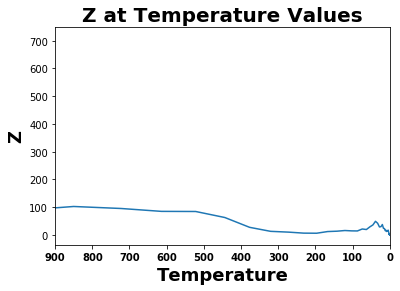

In [26]:
plt.plot(temp, obj_val)
plt.title("Z at Temperature Values", fontsize=20, fontweight='bold')
plt.xlabel("Temperature", fontsize=18, fontweight='bold')
plt.ylabel("Z", fontsize=18, fontweight='bold')

plt.xlim(temp_para_plotar, 0)
plt.xticks(np.arange(min(temp), max(temp), 100), fontweight='bold')
plt.yticks